In [1]:
import numpy as np
import matplotlib.pyplot as plt

#True params
m_true = -0.9594
b_true = 4.294
f_true = 0.534
#synthetic data
N = 50
x = np.sort(10*np.random.rand(N))

yerr = 0.1+0.5*np.random.rand(N)

y = m_true*x+b_true
g = m_true*x+b_true

y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)



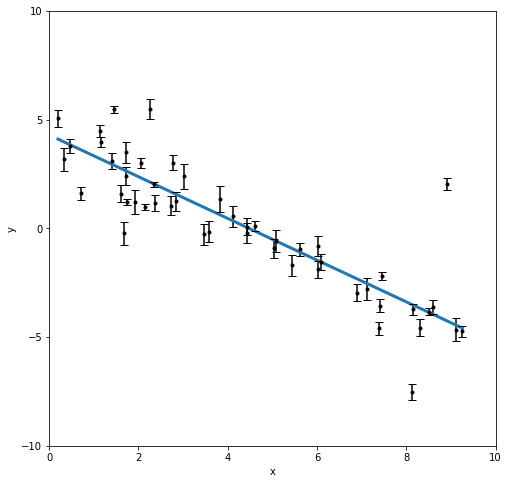

In [2]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3)
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);


In [3]:
A = np.vstack((np.ones_like(x), x)).T
print("A=",A)
C = np.diag(yerr * yerr)
print('C=',C)
cov= np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
print('cov =', cov)
#print('bov =', bov)
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

gnew = x*m_ls + b_ls


A= [[1.         0.19716203]
 [1.         0.32342266]
 [1.         0.46870107]
 [1.         0.71627446]
 [1.         1.12792521]
 [1.         1.14925834]
 [1.         1.41431867]
 [1.         1.44253987]
 [1.         1.59788818]
 [1.         1.67712912]
 [1.         1.71099657]
 [1.         1.7276647 ]
 [1.         1.73867835]
 [1.         1.93046116]
 [1.         2.05313343]
 [1.         2.1529741 ]
 [1.         2.26640847]
 [1.         2.35706566]
 [1.         2.35938877]
 [1.         2.73398408]
 [1.         2.77956747]
 [1.         2.83763631]
 [1.         3.02364517]
 [1.         3.4738282 ]
 [1.         3.569069  ]
 [1.         3.8216972 ]
 [1.         4.12214999]
 [1.         4.42111906]
 [1.         4.43060097]
 [1.         4.60884195]
 [1.         5.02840148]
 [1.         5.07693973]
 [1.         5.42884911]
 [1.         5.62645796]
 [1.         6.01348756]
 [1.         6.021811  ]
 [1.         6.08809419]
 [1.         6.90020176]
 [1.         7.12618189]
 [1.         7.3800983

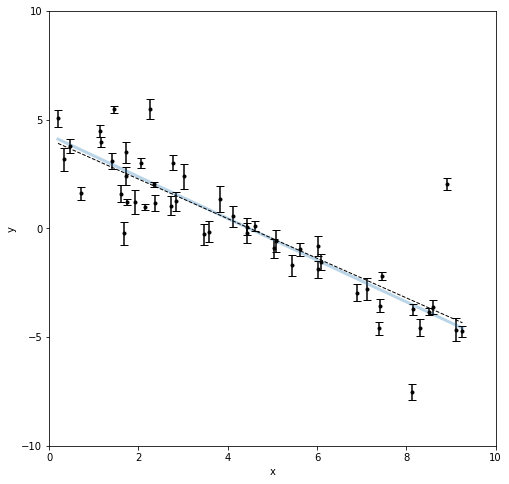

In [4]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [5]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

glikely = x*m_ml + b_ml;



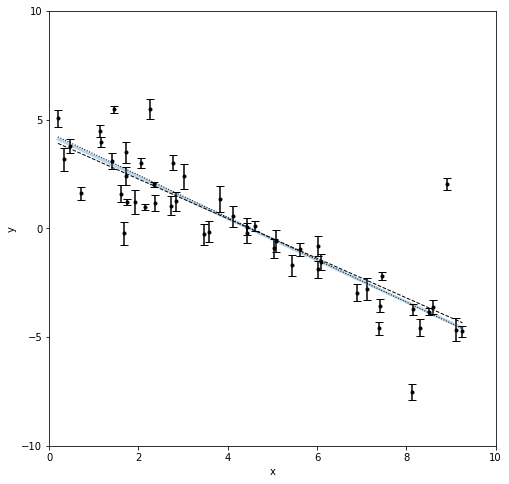

In [6]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.plot(x, glikely, linewidth=1, linestyle=':', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [7]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf


def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)



In [8]:
%time
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 500);


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


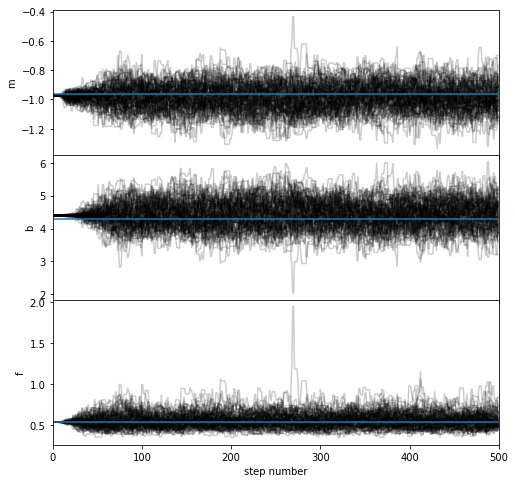

In [9]:
sampler.chain[:,:,0]
fig, ax = plt.subplots(3,1, figsize=(8,8))
for i in range(100):
    ax[0].plot(np.arange(0,500).T,sampler.chain[i,:,0],\
               color='k', alpha=0.2)
for i in range(100):
    ax[1].plot(np.arange(0,500).T,sampler.chain[i,:,1],\
               color='k', alpha=0.2)
for i in range(100):
    ax[2].plot(np.arange(0,500).T,np.e**sampler.chain[i,:,2],\
               color='k', alpha=0.2)

ax[0].axhline(y=-0.9594)
ax[1].axhline(y=4.294)
ax[2].axhline(y=0.534)
ax[0].set_ylabel("m")
ax[1].set_ylabel("b")
ax[2].set_ylabel("f")

ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[2].set_xlim(0,500)

ax[2].set_xlabel("step number")
ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)
plt.subplots_adjust(hspace = 0)

In [10]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
samples

array([[-0.93156262,  4.35349115, -0.54211744],
       [-0.93156262,  4.35349115, -0.54211744],
       [-0.93849409,  4.35161955, -0.56397694],
       ...,
       [-1.1097191 ,  4.78058235, -0.83402111],
       [-1.09089609,  4.71223421, -0.77638656],
       [-1.07118593,  4.63657256, -0.73874102]])

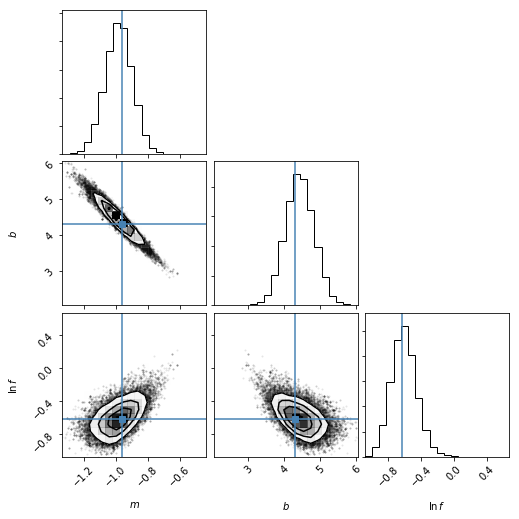

In [11]:
import corner 
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
#fig.savefig("triangle.png")

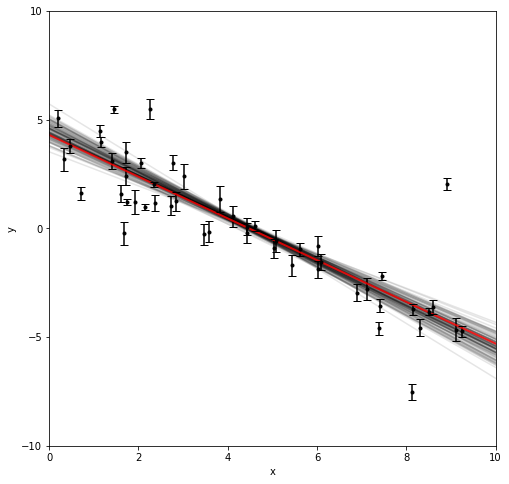

In [12]:
import matplotlib.pyplot as plt
xl = np.array([0, 10])

plt.figure(figsize=(8,8))
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=4)

plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [13]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print(m_mcmc)
print(b_mcmc)
print(f_mcmc)

(-0.9818950379381882, 0.08360986915754487, 0.0856008187980909)
(4.423160117266496, 0.4013001250954229, 0.3935964241743397)
(0.5427542834692933, 0.09017058177235837, 0.0722669719353698)


In [14]:
print("m = ", m_mcmc[0])
print("b = ", b_mcmc[0])
print("f = ", f_mcmc[0])


m =  -0.9818950379381882
b =  4.423160117266496
f =  0.5427542834692933


$m = -1.087^{+0.081}_{-0.081}$, 
$b = 4.840^{+0.362}_{-0.370}$, 
$f = 0.464^{+0.122}_{-0.090}$

(Jeigu leisiu iš naujo vertės pasikeis)